## Conditional entropies evaluation
#### Test conditions: 
    a = 0.5
    b = 1/16.0
    A = 2.5
    omega = 2.0
    gamma = 0.1
    period = 2*np.pi/(1.0*omega)
    h = period/32 # time step
    
    new_data = position[::23]

In [2]:
import sys
sys.path.insert(0, '../../dcgram_v2')
import save_plot as sp
import numpy as np
sys.path.insert(0, '../../dcgram_v2/tests')
from pibic import *
import yaml
import matplotlib.pyplot as plt
import itertools

path = '../..'

In [2]:
# sp.save_plot(parameter='cond_entropies', name='duffing_equation', drange = range(2,6), krange = [3, 5, 7])

## Kolmogorov-Smirnov Tests

In [3]:
def kolmogorov_test(beta = 0.1, D = 2, K = 3, \
                    subseq_len = 1000, subseq_rep = 1000, dataset = 'duffing_equation', L = 1391305):
    
    leg = '{:1.2f}'.format(beta).replace('.', '')
    with open(f'{path}/dcgram_files/{dataset}/original/original_len_{L}.yaml', 'r') as f:
        s = yaml.load(f)    
    with open(f'{path}/dcgram_files/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
        m_test = yaml.load(f)    
#     with open(f'{path}/dcgram_files/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
#         m_test = yaml.load(f)
    with open(f'{path}/dcgram_files/{dataset}_{leg}/original/original_len_{L}.yaml', 'r') as f:
        s_test = yaml.load(f)
    
#     occup_vector = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
    occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
    occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, subseq_len)
    
    stat, p = ks_2samp(occup_vector, occup_vector_anomaly)
    return stat, p

def plot_graph(x=[], y=[], D=2, K=3, ylabel='p-value', color = 'k'):
    plt.plot(x, y, color)
    plt.title(f'D={D}, K={K}')
    plt.xlabel(r'$\beta$')
    plt.ylabel(ylabel)
    plt.yscale('log')
    plt.savefig(f'{ylabel}_D{D}_K{K}.png')

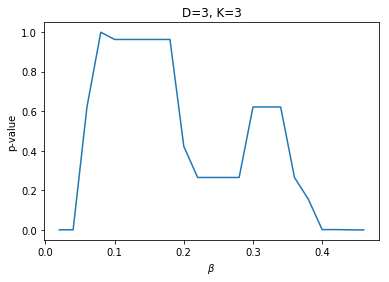

In [28]:
betas = np.arange(0.02, 0.48, 0.02)

p = []
stat = []

for D in [3]:
    K = 3
    
    for beta in betas:
        stval, pval = kolmogorov_test(beta = beta, D = D, K = K, subseq_len = 50000, subseq_rep = 1)
        p.append(pval)
        stat.append(stval)

    plot_graph(betas, p, D, K, ylabel='p-value')


In [29]:
# p_dmark_4 = p.copy()
# st_dmark_4 = stat.copy()
# p_dmark_3 = p.copy()
# st_dmark_3 = stat.copy()
# p_dcgram_4 = p.copy()
# st_dcgram_4 = stat.copy()
p_dcgram_3 = p.copy()
st_dcgram_3 = stat.copy()

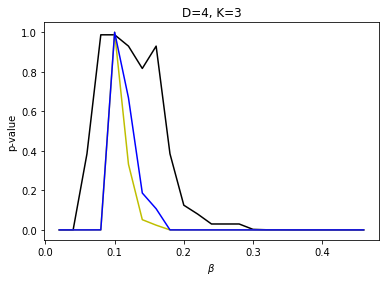

In [41]:
plot_graph(betas, p_dmark_3, D, K, ylabel='p-value', color= 'k')
# plot_graph(betas, p_dcgram_3, D, K, ylabel='p-value', color = 'r')
plot_graph(betas, p_dmark_4, D, K, ylabel='p-value', color= 'y')
plot_graph(betas, p_dcgram_4, D, K, ylabel='p-value', color = 'b')
# plot_graph(betas, stat, D, K, ylabel='p-value')

In [5]:
def evaluate_occup_div(D = 2, K = 3, N = 10000, L = 1391305, betas = []):
    dc_kl = []
    dm_kl = []

    for beta in betas:
        dataset = 'duffing_equation'
        leg = '{:1.2f}'.format(beta).replace('.', '')

        with open(f'{path}/dcgram_files/{dataset}/original/original_len_{L}.yaml', 'r') as f:
            s = yaml.load(f)    
        with open(f'{path}/dcgram_files/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
            m_test = yaml.load(f)    
        with open(f'{path}/dcgram_files/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
            m = yaml.load(f)
        with open(f'{path}/dcgram_files/{dataset}_{leg}/original/original_len_{L}.yaml', 'r') as f:
            s_test = yaml.load(f)

        dc_occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
        # occup_vector2 = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
        dc_occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, N)
        dm_occup_vector = eig.occup_vector(m)    # Calculate occupation vector from eigen vectors
        dm_occup_vector_anomaly = sa.calc_occup_vector_dict(m, s_test, N)

        dc_kl.append(sa.calc_kldivergence_vector(dc_occup_vector, dc_occup_vector_anomaly))
        dm_kl.append(sa.calc_kldivergence_vector(dm_occup_vector, dm_occup_vector_anomaly))
        
    with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dc_kl}, f)
    with open(f'kl_results/kl_dmark_D{D}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dm_kl}, f)

In [28]:

D = []


Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

In [6]:
D = [1,2,3,4]
K = [3]
N = [1000, 5000, 10000, 100000]
b = np.arange(0.01, 0.48, 0.01)

possibilities = list(itertools.product(D, K, N))

for (D, K, N) in possibilities:
    evaluate_occup_div(D = D, K = K, N = N, betas = b)

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

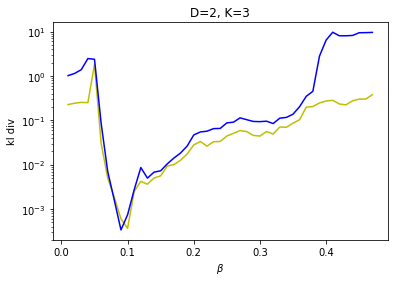

In [31]:
with open(f'kl_results/kl_dcgram_D{2}_K{3}_N{10000}', 'r') as f:
    result = yaml.load(f)
    dc = result['kl']
with open(f'kl_results/kl_dmark_D{2}_N{10000}', 'r') as f:
    result = yaml.load(f)
    dm = result['kl']
    betas = result['betas']

plot_graph(betas, dc, D, K, ylabel='kl div', color= 'y')
plot_graph(betas, dm, D, K, ylabel='kl div', color = 'b')

In [8]:
dc_occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
# occup_vector2 = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
dc_occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, 50000)
dm_occup_vector = eig.occup_vector(m)    # Calculate occupation vector from eigen vectors
dm_occup_vector_anomaly = sa.calc_occup_vector_dict(m, s_test, 50000)

In [10]:
sa.calc_kldivergence_vector(dc_occup_vector, dc_occup_vector_anomaly)

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************


0.43630569865349217

In [31]:
print(ks_2samp(abs(occup_vector), occup_vector_anomaly))
print(ks_2samp(occup_vector2, occup_vector_anomaly))

Ks_2sampResult(statistic=0.07092198581560283, pvalue=0.8576867715056422)
Ks_2sampResult(statistic=0.07092198581560283, pvalue=0.8576867715056422)


In [ ]:
occup_vector, std, avg = calc_mean_vector(m_test, s, 1000, rep = 1000)

In [ ]:
len(m_test.states)

In [ ]:
st = m.states
idx = dict((s.name, st.index(s)) for s in st)

In [ ]:
occup_vector = sa.calc_occup_vector(m_test, s, 1300000)
x = eig.occup_vector(m_test)
ocp = sa.iterate_machine(m_test, 1300000)

In [ ]:
from sklearn.metrics import mean_squared_error

print(occup_vector)
print(ocp)
print(x)
print(f'2 simulated: {ks_2samp(occup_vector, ocp)}')
print(f'simulated vs calculated: {ks_2samp(x, ocp)}')
# mean_squared_error(occup_vector, ocp)

In [ ]:
from sklearn.preprocessing import normalize
ct = [63134, 101020, 17457, 73642, 55612, 16209, 57215, 45418, 24806, 23908, 56857, 45241, 17445, 16325, 101160, 74271, 24813, 62649, 55969, 23793, 5519, 11153, 53757, 53486, 36483, 28366, 28525, 5781, 36437, 33054, 11248, 33077, 3033, 3137]

occup_vector = normalize(np.array(ct).reshape(-1, 1), norm='l1', axis=0).ravel()

In [ ]:
occup_vector